# Task 2 : Movie Rating Prediction with Python

*Varad Deshmukh*

---

**Instructions**

* Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
* Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

> ## Importing Libraries

In this project, along with the usual `NumPy` and `pandas`, we will need many modules from the `sklearn` library as well. To have an easier reference to the imported modules and classes and their usage at appropriate places, we will import them as they are required, and their rationale will be explained there itself.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

> ## Loading the dataset

The survival data is present in the form of a 'csv' file named 'IMDb_Movies_India.csv'. We read that into a `pandas DataFrame` for subsequent analysis.

In [2]:
# read the 'tested.csv' file into a DataFrame and have a glimpse of it
imdb = pd.read_csv('IMDb_Movies_India.csv', encoding='latin-1')
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


> ## Data Preprocessing

Data Preprocessing involves understanding the datatypes of the columns, checking for any missing values and subsequently cleaning the data.

In [3]:
# high-level information about our data
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


We check for missing data now.

In [4]:
# check for missing data
imdb.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

This shows our data is replete with missing data points. We need to clean it. First we check for duplicates, if any, and delete them.

In [5]:
# check for duplicates
imdb.duplicated().sum()

6

In [6]:
# delete the duplicates
imdb = imdb.drop_duplicates()

In [7]:
# have they been deleted?
imdb.duplicated().sum()

0

Since in our data, it would not be a good idea to impute the missing values by any strategy as mean or otherwise, we decide to drop the records where the data is missing altogether. Consider for example the Directors column. We have 525 null values in the directors column. Since director of a movie cannot be treated as a numerical variable, it is altogether not feasible to just impute the director with the maximum number of movies as the missing value marker. This will unnecessarily increase the weight of that director. Moreover, when we feed this data into our machine learning model, this undue weightage given to the said director will certainly influence the predictive abilities of our model. So, we better abhor it and drop the missing values altogether. Same goes with other columns as well.

In [8]:
# drop the missing values
imdb.dropna(inplace=True)

In [9]:
# data after dropping missing values
imdb.shape

(5659, 10)

Next, we move towards cleaning our data. Let's see how our data looks like.

In [10]:
# how it looks like
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


We can see that the 'Year' column needs to be cleaned, as all the years are given within parentheses. We need to remove them. Moreover, the 'Duration' column needs to be cleaned as the duration is succeeded by a space and the words 'min'. We need to remove them. Also, the 'Votes' column is following the standard numbering system, with a comma separating the interval of 3 numbers from the right, as is the international practice. We need to remove the comma as well.

In [11]:
# remove the parantheses in the column 'Year'
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True)
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
# remove the space and word 'min' from the column 'Duration'
imdb['Duration'] = imdb['Duration'].str.replace(r' min', '', regex=True)
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
# remove the comma separating intervals in column 'Votes'
imdb['Votes'] = imdb['Votes'].str.replace(',', '')
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Now, the data looks clean and nice. Next, we look whether our data columns are in a proper data type or not.

In [14]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


The columns 'Year, 'Duration' and 'Votes' should be integers, but are strings. We need to typecast them into integers. We do this next.

In [15]:
# typecast the columns into 'int'
cols = ['Year', 'Duration', 'Votes']
for col in cols:
    imdb[col] = imdb[col].astype('int')

Now, the data types look relevant.

In [16]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


Next, we drop the 'Genre' column as it contains too many categories, and multiple categories are clubbed into one record as well. So it would be difficult to label encode them as well.

In [17]:
# drop the 'Genre' column
imdb.drop('Genre', axis=1, inplace=True)

In [18]:
imdb.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


> ## Data Visualisation

We intend to visualise the data to find out any apparent correlation between the variables, so that we can do the feature engineering and choose the relevant variables for our machine learning model.

For conducting the bivariate analysis, we plot all the numerical variables in our dataset, pair-wise. For this, we employ the `pairplot` as provided by `seaborn`. At the diagonal, is the histogram of the variable concerned, and all off-diagonal plots are bivariate scatter plots, showing the relation between all the numerical variables, pair-wise.

/Users/varad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


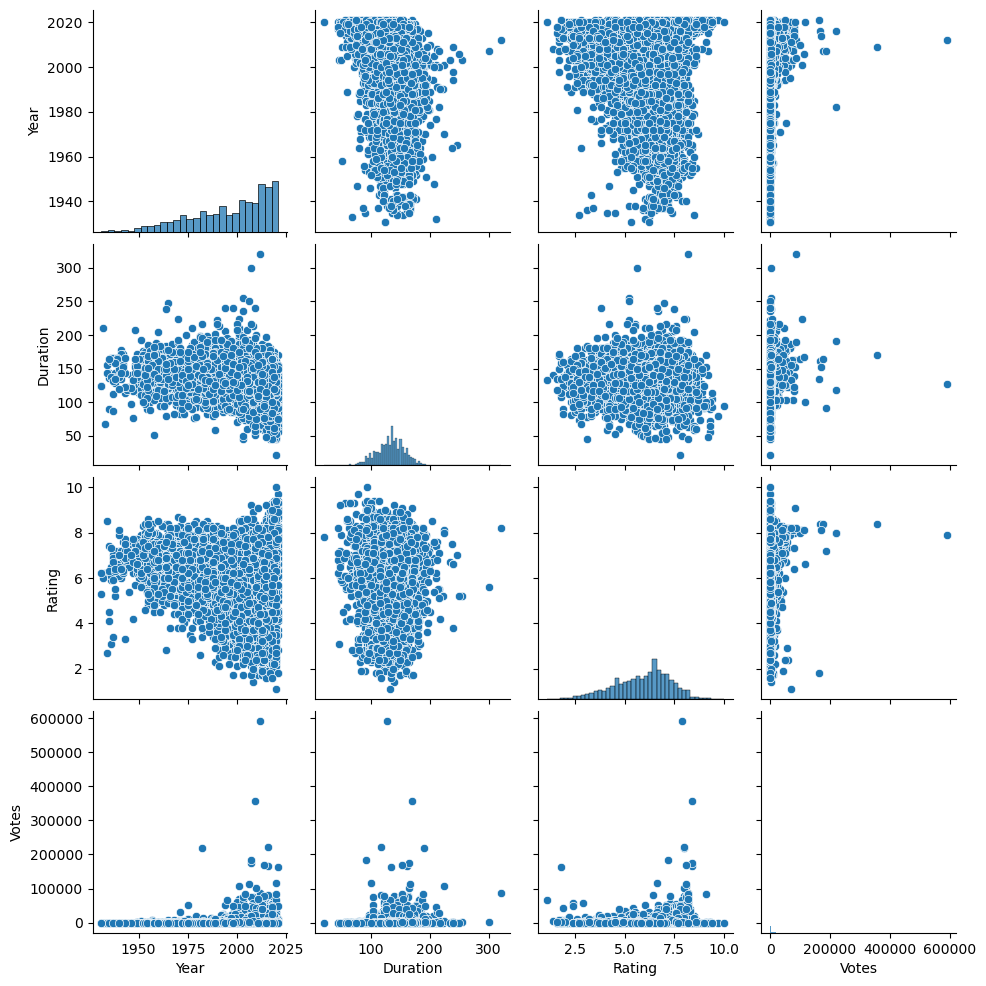

In [19]:
# plot all numerical variables pair-wise
sns.pairplot(data=imdb)

The pairplot doesn't look like we have got any correlation between the numerical variables. We confirm this using the correlation matrix and heatmap for the dataset.

In [20]:
# check for correlation between the numerical variables
imdb.corr(numeric_only=True)

,Year,Duration,Rating,Votes
Year,1.000000,-0.327567,-0.204642,0.129749
Duration,-0.327567,1.000000,0.001839,0.097621
Rating,-0.204642,0.001839,1.000000,0.142563
Votes,0.129749,0.097621,0.142563,1.000000


<Axes: >

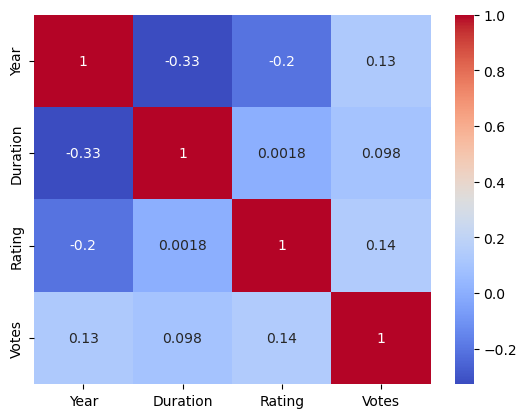

In [21]:
# plot the correlation matrix visually
sns.heatmap(imdb.corr(numeric_only=True), annot=True, cmap='coolwarm')

Indeed this shows that there is very little to no correlation between the numerical features and the rating target variable. Thus, we can anticipate that our machine learning model will not be that accurate in predicting the ratings.

> ## Label Encoding

Label Encoding is used to convert categorical variables into numerical ones. Here, the columns 'Director', 'Actor 1', 'Actor 2' and 'Actor 3' are categorical, with the values as strings. For feeding them into our machine learning model, we need to encode them into numerical categories. This we accomplish using the `LabelEncoder` class that scikit-learn provides us.

In [22]:
# use label encoding to convert categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

cat_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in cat_cols:
    imdb[col] = labels.fit_transform(imdb[col])

In [23]:
# see the results of label encoding
imdb.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,5.6,326,135,1934,1175,1013


We have converted the columns into numerical categories. We can see the number of records according to the categories for these columns.

In [24]:
for col in cat_cols:
    print(col, ' : ', imdb[col].nunique(), imdb[col].value_counts().head())

Director  :  2431 Director
480     41
1090    39
1642    33
731     33
1975    33
Name: count, dtype: int64
Actor 1  :  1960 Actor 1
156    104
971     93
284     91
468     90
682     89
Name: count, dtype: int64
Actor 2  :  2321 Actor 2
1619    52
659     48
1123    38
491     38
100     34
Name: count, dtype: int64
Actor 3  :  2556 Actor 3
1546    57
266     51
1570    32
1482    30
1250    29
Name: count, dtype: int64


> ## Modelling the data

We now build our machine learning model. We intend to employ the Random Forest Regression model for our purposes. So we import the necessary model classes, the metrics, etc, from scikit-learn. Next we separate our data into the features and target, then train the model on the training data and then employ it to predict the ratings for the test data. We also enumerate the model's accuracy.

In [25]:
# import necessary model classes, etc.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [26]:
# separate data into features and target
X = imdb.drop(columns=['Name', 'Year', 'Rating'], axis=1)
y = imdb['Rating']

In [27]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# look how the training and test data looks like
print('Shapes :')
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

Shapes :
X_train :  (4527, 6)
X_test :  (1132, 6)
y_train :  (4527,)
y_test :  (1132,)


In [28]:
# instantiate the model
model = RandomForestRegressor(n_estimators=100)

In [29]:
# train the model on our training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
# have the model predict the test data and ascertain its accuracy
test_predictions = model.predict(X_test)
score = model.score(X_train, y_train)
print('Model Accuracy : {:.2f}%'.format(score * 100))

Model Accuracy : 87.93%


As we have guessed, the model is not that accurate as we hoped.